In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
A = np.zeros((2,2))
while np.linalg.det(A) == 0:
    A = np.random.randint (1, 20, (5, 5))
    for i in range(5): A[i,i] = 20
b = np.random.randint (0, 20, 5)
E = 0.001
P = np.linalg.solve(A, b)
print(A, b, P)

[[20 19  3  5 10]
 [ 6 20 19  7 16]
 [ 2  6 20  3 15]
 [17 12 19 20 11]
 [ 6  6 17 15 20]] [14  6 13  1 19] [ 0.64064167 -0.67581013 -0.52076608 -0.62313617  1.87055383]


In [57]:
def Messure(A, B):
    N = len(B)
    s = 0
    for i in range(N):
        s = s + (abs(A[i] - B[i]))**2

    return np.sqrt(s)

def Prod(A, x, i):
    N = len(x)
    s = 0
    
    for j in range(N):
        if j != i: s += A[i][j]*x[j]
    
    return s

def Simp(A, b, P, E):
    N = len(b)

    x, y = np.zeros(N), np.zeros(N)
    k = 0

    while Messure(x, P) > E and k < 1000:
        for i in range(N):
            y[i] = (b[i] - Prod(A, x, i))/A[i,i]
        x = y
        k+=1

    return (x, k)    

print(Simp(A, b, P, 0.001))

(array([ 0.64127693, -0.67613962, -0.52080373, -0.62357655,  1.87082439]), 20)


In [59]:
def Prod_Zeydel(A, x, y, i):
    N = len(x)
    s = 0
    
    for j in range(N):
        if j < i: s += A[i][j]*y[j]
        elif j > i: s += A[i][j]*x[j]
    
    return s

def Gauss_Zeydel(A, b, P, E):
    N = len(b)

    x, y = np.zeros(N), np.zeros(N)
    k = 0

    while Messure(x, P) > E and k < 1000:
        for i in range(N):
            y[i] = (b[i] - Prod_Zeydel(A, x, y, i))/A[i,i]
        x = y
        k+=1


    return (x, k)    

print(Gauss_Zeydel(A, b, P, 0.001))

(array([ 0.64116405, -0.67608391, -0.52078843, -0.62349823,  1.8707698 ]), 20)


In [63]:
def Gauss_Zeydel_with_argument(A, b, P, E, w):
    N = len(b)

    x, y = np.zeros(N), np.zeros(N)
    k = 0

    while Messure(x, P) > E and k < 1000:
        for i in range(N):
            y[i] = (1-w)*x[i] + w*(b[i] - Prod_Zeydel(A, x, y, i))/A[i,i]
        x = y
        k+=1


    return (x, k)    

print(Gauss_Zeydel_with_argument(A, b, P, 0.001, 0.5))

(array([ 0.6408716 , -0.67589834, -0.52010531, -0.62343828,  1.87001474]), 47)


C:\Users\ddigo\AppData\Local\Temp\ipykernel_28076\3290455842.py:5: RuntimeWarning: overflow encountered in double_scalars
  s = s + (abs(A[i] - B[i]))**2
C:\Users\ddigo\AppData\Local\Temp\ipykernel_28076\957544707.py:6: RuntimeWarning: overflow encountered in double_scalars
  if j < i: s += A[i][j]*y[j]
C:\Users\ddigo\AppData\Local\Temp\ipykernel_28076\957544707.py:7: RuntimeWarning: invalid value encountered in double_scalars
  elif j > i: s += A[i][j]*x[j]
C:\Users\ddigo\AppData\Local\Temp\ipykernel_28076\957544707.py:6: RuntimeWarning: invalid value encountered in double_scalars
  if j < i: s += A[i][j]*y[j]
C:\Users\ddigo\AppData\Local\Temp\ipykernel_28076\1741386002.py:9: RuntimeWarning: overflow encountered in double_scalars
  y[i] = (1-w)*x[i] + w*(b[i] - Prod_Zeydel(A, x, y, i))/A[i,i]


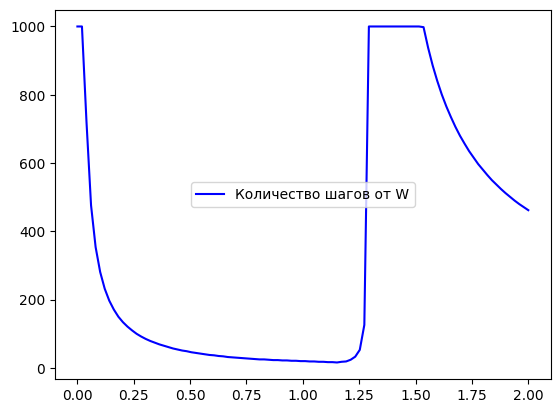

In [78]:
t = np.linspace(0, 2, 100)
Z = np.zeros(len(t))

for i in range(len(t)):
    temp = Gauss_Zeydel_with_argument(A, b, P, 0.001, t[i])[1]
    try:
        Z[i] = temp
    except TypeError or RuntimeWarning:
        Z[i] = 1000

plt.plot(t, Z, color = 'blue', label = 'Количество шагов от W')
plt.legend()
plt.show()